In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('speed-dating_csv.csv')

In [3]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
has_null                           int64
wave                               int64
gender                             object
age                                float64
age_o                              float64
d_age                              int64
d_d_age                            object
race                               object
race_o                             object
samerace                           int64
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race             object
d_importance_same_religion         object
field                              object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pr

In [4]:
print(df.columns.values)

['has_null' 'wave' 'gender' 'age' 'age_o' 'd_age' 'd_d_age' 'race'
 'race_o' 'samerace' 'importance_same_race' 'importance_same_religion'
 'd_importance_same_race' 'd_importance_same_religion' 'field'
 'pref_o_attractive' 'pref_o_sincere' 'pref_o_intelligence' 'pref_o_funny'
 'pref_o_ambitious' 'pref_o_shared_interests' 'd_pref_o_attractive'
 'd_pref_o_sincere' 'd_pref_o_intelligence' 'd_pref_o_funny'
 'd_pref_o_ambitious' 'd_pref_o_shared_interests' 'attractive_o'
 'sinsere_o' 'intelligence_o' 'funny_o' 'ambitous_o' 'shared_interests_o'
 'd_attractive_o' 'd_sinsere_o' 'd_intelligence_o' 'd_funny_o'
 'd_ambitous_o' 'd_shared_interests_o' 'attractive_important'
 'sincere_important' 'intellicence_important' 'funny_important'
 'ambtition_important' 'shared_interests_important'
 'd_attractive_important' 'd_sincere_important' 'd_intellicence_important'
 'd_funny_important' 'd_ambtition_important'
 'd_shared_interests_important' 'attractive' 'sincere' 'intelligence'
 'funny' 'ambition' 'd_at

# Exploratory Data Analysis (EDA)

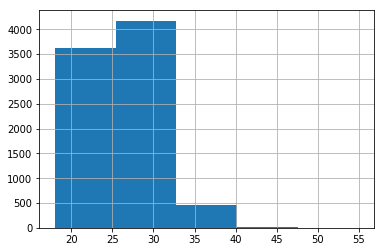

In [5]:
df['age'].hist(bins=5)
# survey shows for people between 20 - 40 years old

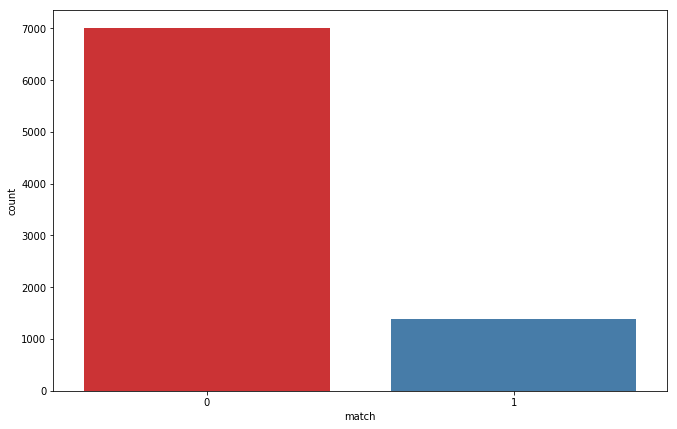

In [6]:
plt.figure(figsize=(11,7))
sns.countplot(x='match',data=df,palette='Set1')

# Survey data shows more unlucky person found the match

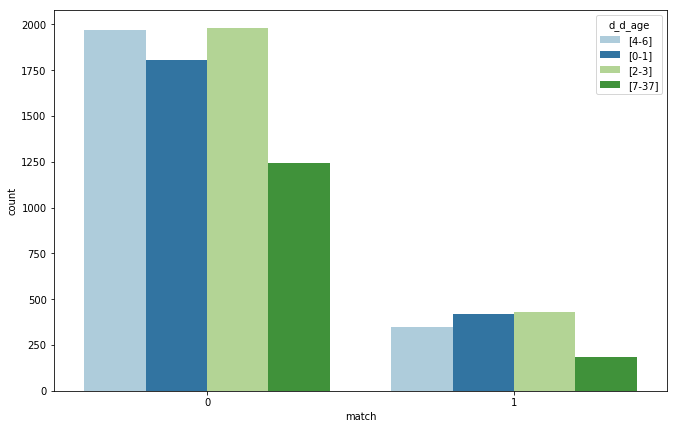

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(x='match',hue='d_d_age',data=df,palette='Paired')

# Survey shows age different between [2-3] has better luck to find the match

In [8]:
# Correlation Heatmap (Mark's sugesstion)
#High level
df1 = df.drop(list(df.filter(regex = 'd_')), axis = 1)
df2 = df1.drop(['has_null','wave','race','race_o','field','gender'],axis=1)

In [9]:
df2.head()

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
2,21.0,22.0,1,2.0,4.0,19.0,18.0,19.0,18.0,14.0,...,9.0,8.0,1.0,0.16,7.0,NaN,1.0,1,1,1
3,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1


In [10]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 54 columns):
age                         8283 non-null float64
age_o                       8274 non-null float64
samerace                    8378 non-null int64
importance_same_race        8299 non-null float64
importance_same_religion    8299 non-null float64
pref_o_attractive           8289 non-null float64
pref_o_sincere              8289 non-null float64
pref_o_intelligence         8289 non-null float64
pref_o_funny                8280 non-null float64
pref_o_ambitious            8271 non-null float64
attractive_o                8166 non-null float64
sinsere_o                   8091 non-null float64
intelligence_o              8072 non-null float64
funny_o                     8018 non-null float64
ambitous_o                  7656 non-null float64
attractive_important        8299 non-null float64
sincere_important           8299 non-null float64
intellicence_important      8299 non-null flo

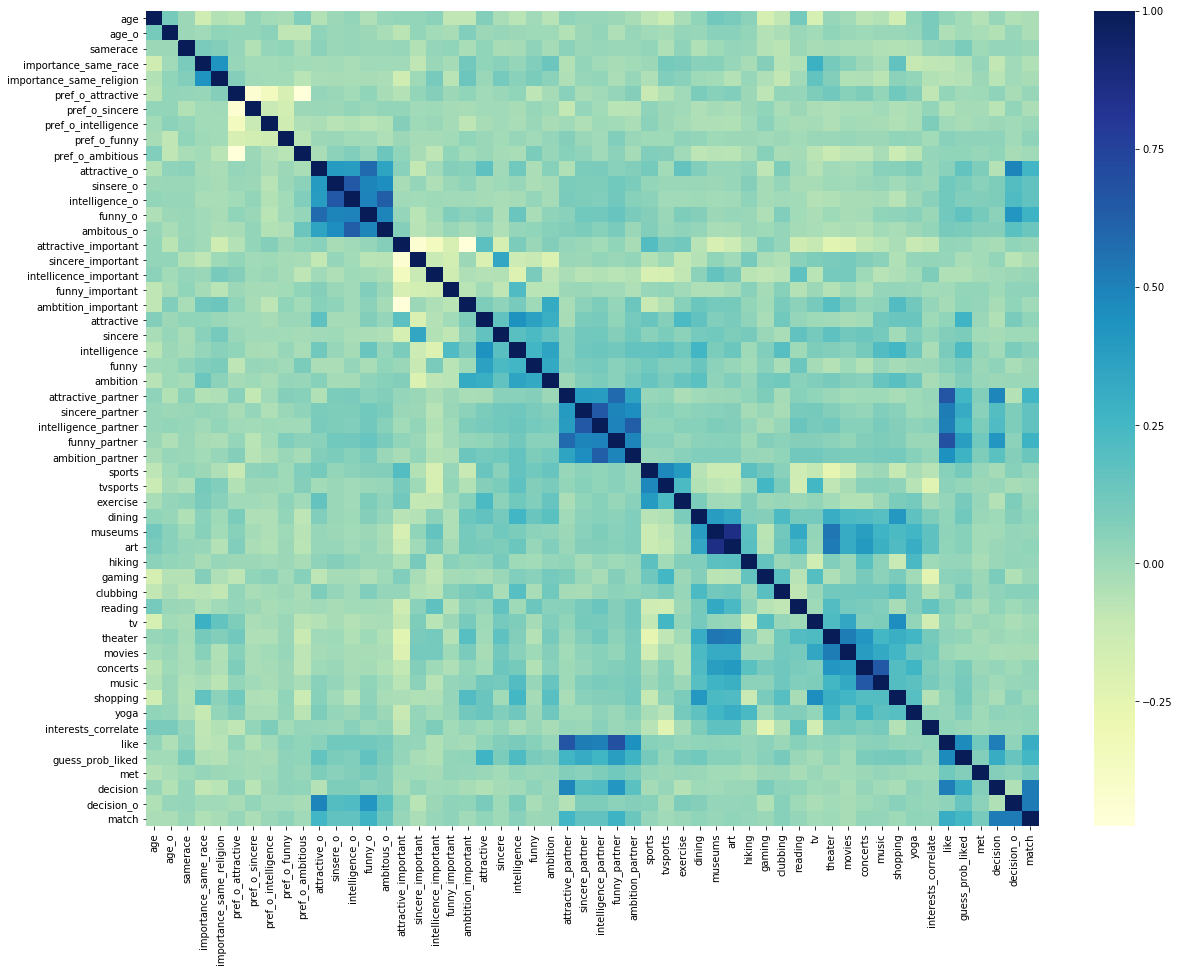

In [11]:
plt.figure(figsize=(20,15))
c = df2.corr()
sns.heatmap(c,
            xticklabels=c.columns.values,
           yticklabels=c.columns.values,
           cmap="YlGnBu")

In [12]:
cat_feats = ['gender']
dfc = pd.get_dummies(df,columns=cat_feats,drop_first=True)
dfc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
has_null                           int64
wave                               int64
age                                float64
age_o                              float64
d_age                              int64
d_d_age                            object
race                               object
race_o                             object
samerace                           int64
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race             object
d_importance_same_religion         object
field                              object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pref_o_attractive                object
d_pr

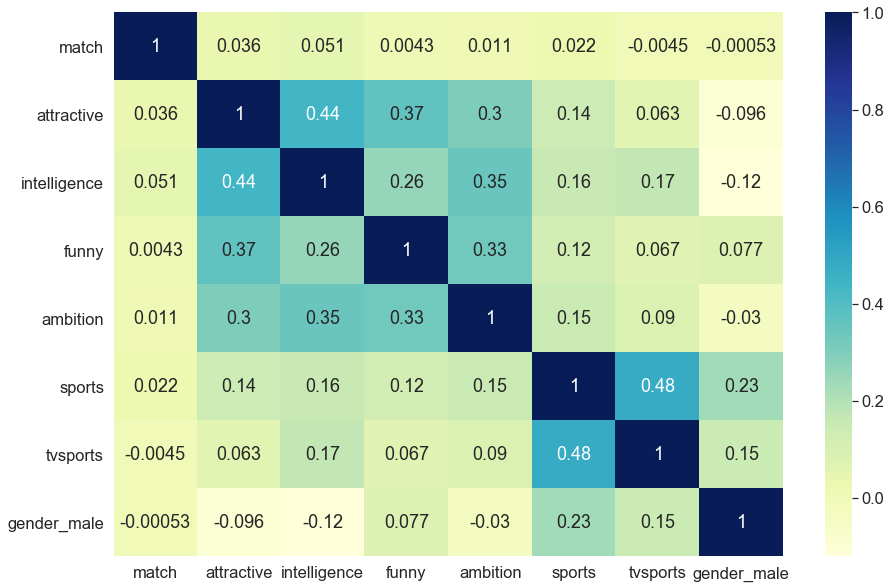

In [13]:
#Low level Correlation Heatmap

df3 = pd.concat([dfc['match'],dfc['attractive'],dfc['intelligence'],dfc['funny'],dfc['ambition'],dfc['sports'],
                 dfc['tvsports'],dfc['gender_male']],axis=1)
plt.figure(figsize=(15,10))
c = df3.corr()
sns.set(font_scale=1.5)
sns.heatmap(c,
            xticklabels=c.columns.values,
           yticklabels=c.columns.values,
           cmap="YlGnBu",annot=True)

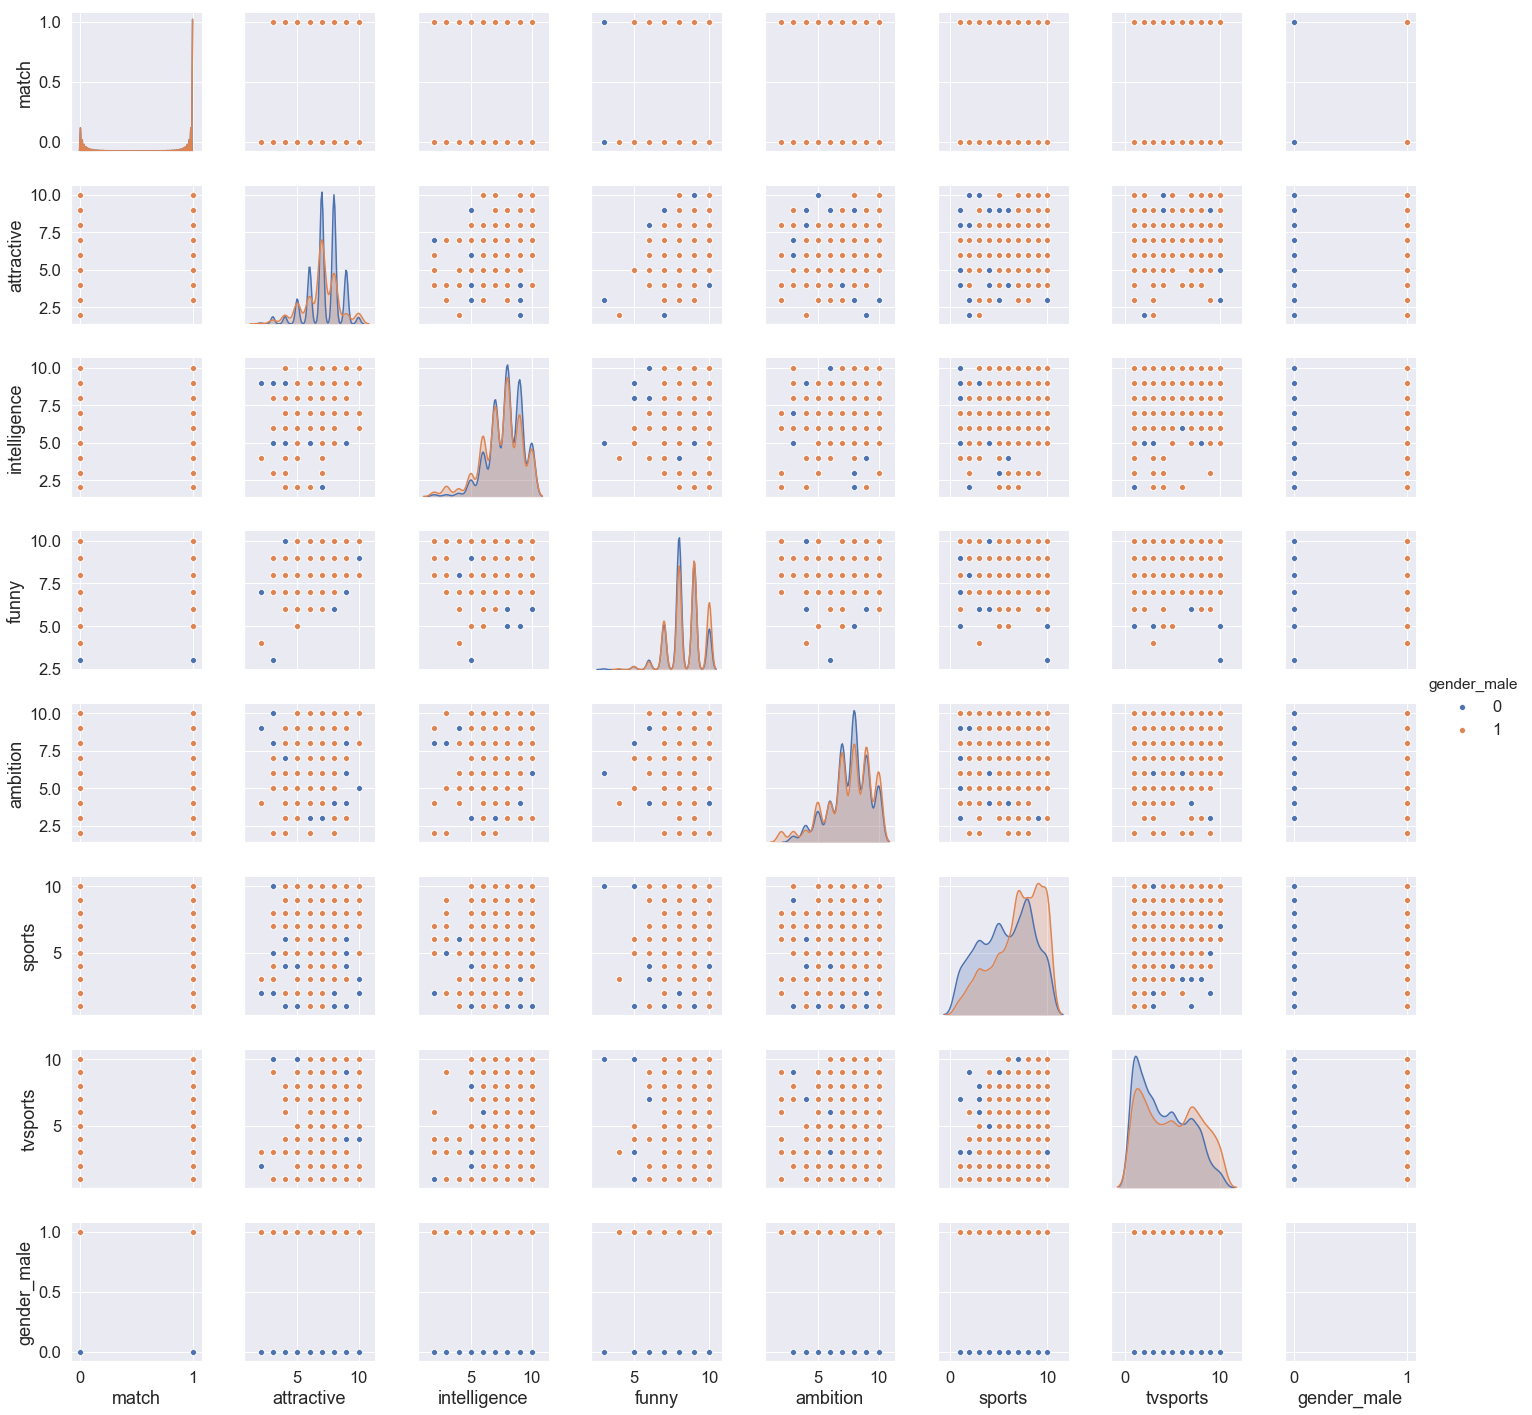

In [14]:
sns.pairplot(df3,hue='gender_male')

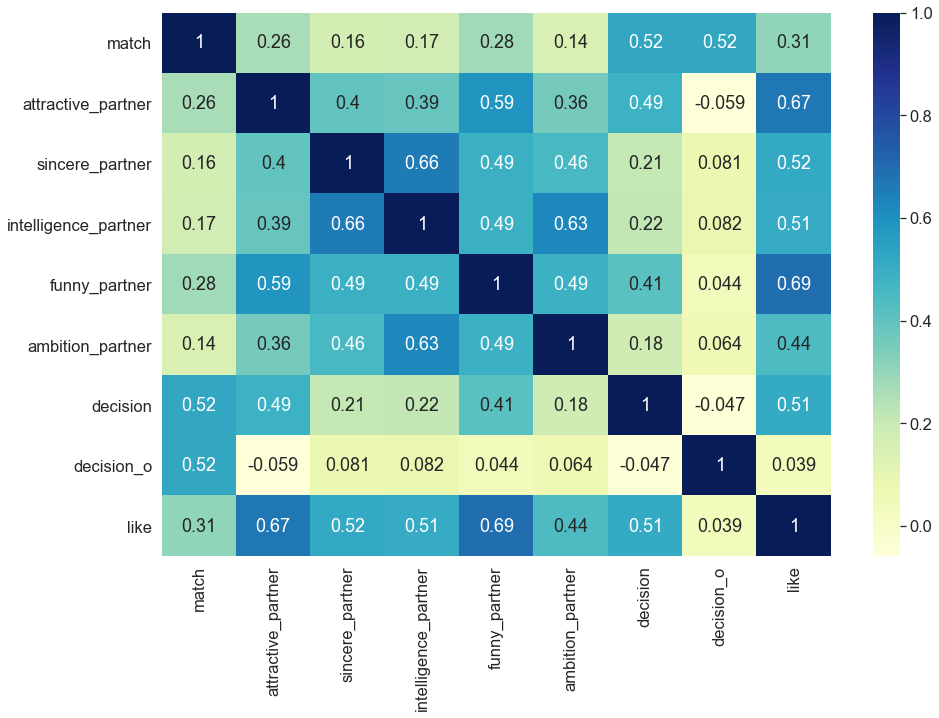

In [15]:
#Low level Correlation Heatmap

df4 = pd.concat([df['match'],df['attractive_partner'],df['sincere_partner'],df['intelligence_partner'],df['funny_partner'],df['ambition_partner'],df['decision'],df['decision_o'],df['like']],axis=1)
plt.figure(figsize=(15,10))
d = df4.corr()
sns.set(font_scale=1.5)
sns.heatmap(d,
            xticklabels=d.columns.values,
           yticklabels=d.columns.values,
           cmap="YlGnBu",annot=True)

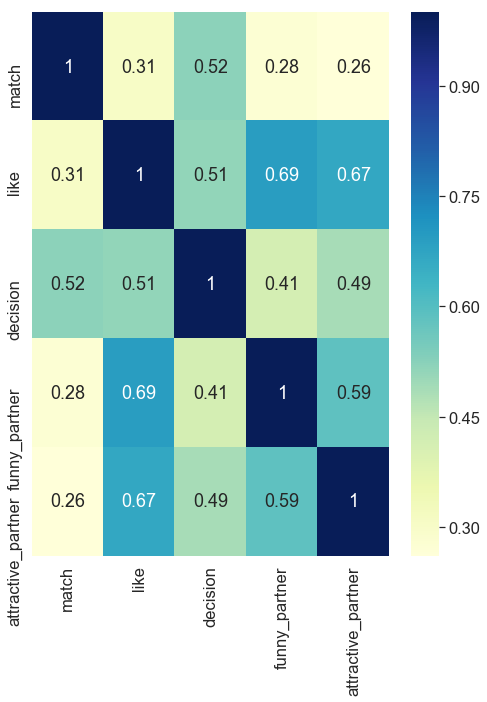

In [16]:
#Low level Correlation Heatmap

df5 = pd.concat([df['match'],df['like'],df['decision'],df['funny_partner'],df['attractive_partner']],axis=1)
plt.figure(figsize=(8,10))
e = df5.corr()
sns.set(font_scale=1.5)
sns.heatmap(e,
            xticklabels=e.columns.values,
           yticklabels=e.columns.values,
           cmap="YlGnBu",annot=True)

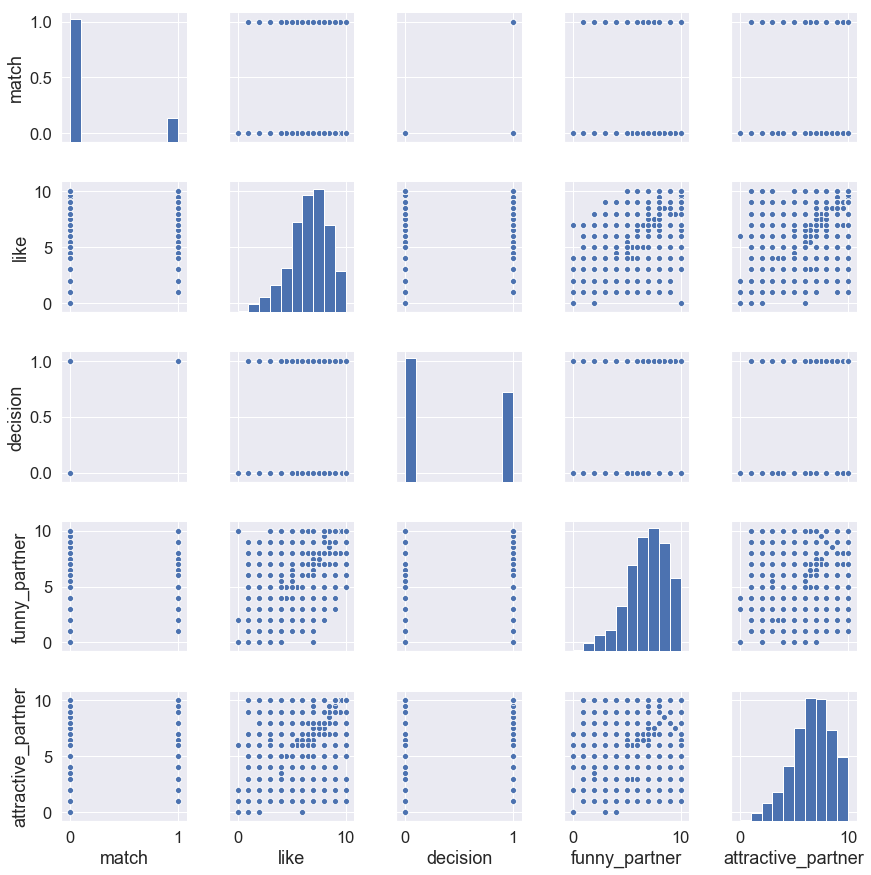

In [17]:
sns.pairplot(df5)

# Data Cleaning

In [18]:
# Drop columns that start with 'd_' and couple others that not used
df.drop(list(df.filter(regex = 'd_')), axis = 1, inplace = True)

In [19]:
df.drop(['has_null','wave','race','race_o','field'],axis=1, inplace = True)

In [20]:
df.head()

,gender,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,female,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
2,female,21.0,22.0,1,2.0,4.0,19.0,18.0,19.0,18.0,...,9.0,8.0,1.0,0.16,7.0,NaN,1.0,1,1,1
3,female,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,female,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1


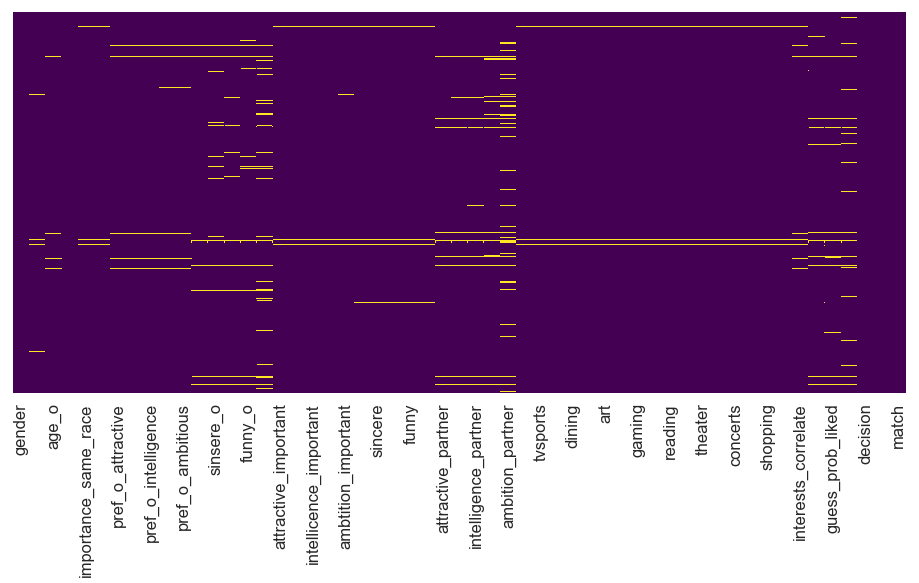

In [21]:
#Find out the missing data using Heatmap
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
# Drop records that age is null 
df.dropna(subset=['age','age_o'], inplace = True)
df.shape

(8180, 55)

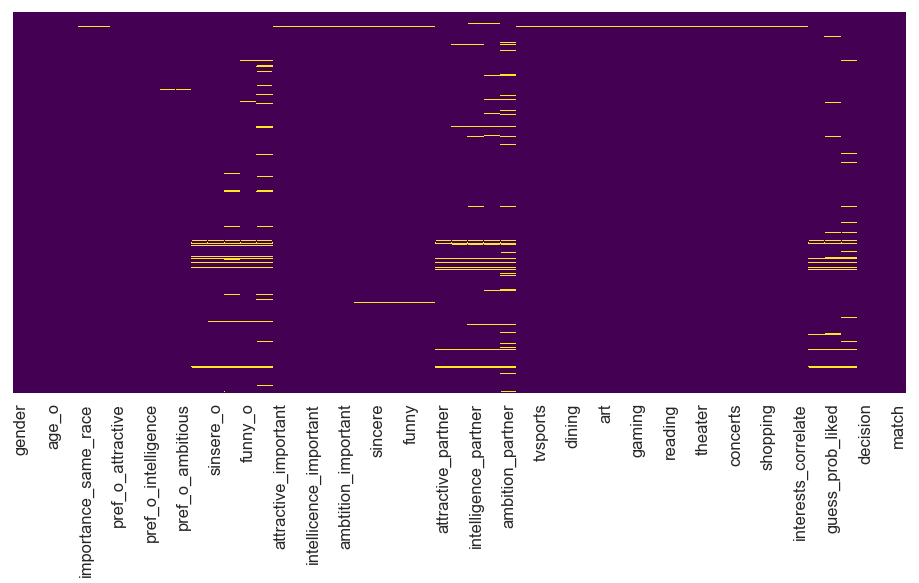

In [23]:
#Find out the missing data using Heatmap
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
df.dropna(inplace = True)
df.shape

(6503, 55)

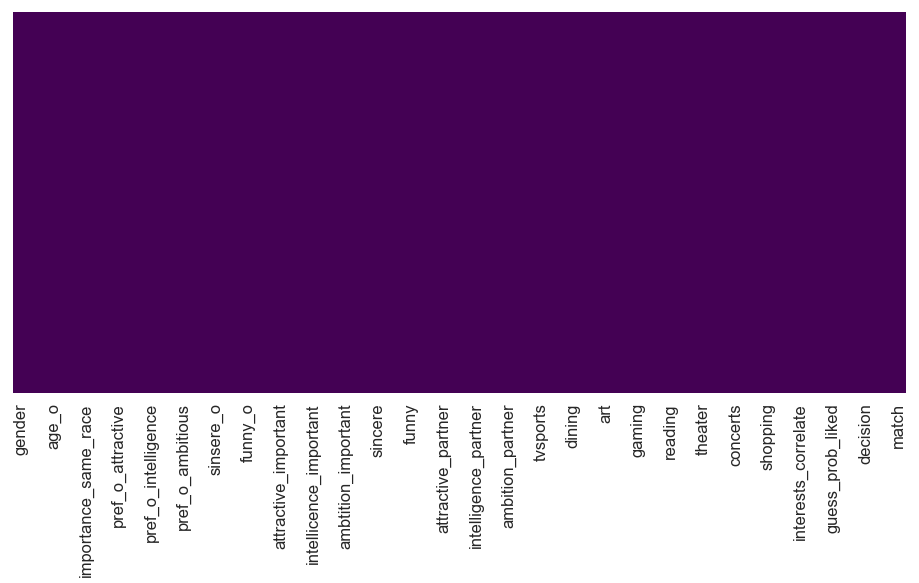

In [25]:
#Find out the missing data using Heatmap
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
df.head()

,gender,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,female,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
3,female,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,female,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1
5,female,21.0,25.0,0,2.0,4.0,50.0,0.0,30.0,10.0,...,9.0,8.0,1.0,0.25,6.0,5.0,0.0,0,1,0


In [27]:
cat_feats = ['gender']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6503 entries, 0 to 8377
Data columns (total 55 columns):
age                         6503 non-null float64
age_o                       6503 non-null float64
samerace                    6503 non-null int64
importance_same_race        6503 non-null float64
importance_same_religion    6503 non-null float64
pref_o_attractive           6503 non-null float64
pref_o_sincere              6503 non-null float64
pref_o_intelligence         6503 non-null float64
pref_o_funny                6503 non-null float64
pref_o_ambitious            6503 non-null float64
attractive_o                6503 non-null float64
sinsere_o                   6503 non-null float64
intelligence_o              6503 non-null float64
funny_o                     6503 non-null float64
ambitous_o                  6503 non-null float64
attractive_important        6503 non-null float64
sincere_important           6503 non-null float64
intellicence_important      6503 non-null flo

In [28]:
df.head()

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match,gender_male
0,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,...,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0,0
1,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,...,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0,0
3,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,...,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1,0
4,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,...,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1,0
5,21.0,25.0,0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,...,8.0,1.0,0.25,6.0,5.0,0.0,0,1,0,0


# Modeling - Classification

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print (confusion_matrix(y_test, predicted))
    print('\n')
    print (classification_report(y_test, predicted))
    #plt.scatter(y_test, predicted)
    

## Train Test Split

In [30]:
df5.dropna(inplace = True)
df5.shape
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980 entries, 0 to 8377
Data columns (total 5 columns):
match                 7980 non-null int64
like                  7980 non-null float64
decision              7980 non-null int64
funny_partner         7980 non-null float64
attractive_partner    7980 non-null float64
dtypes: float64(3), int64(2)
memory usage: 374.1 KB


In [31]:
df5.head()

,match,like,decision,funny_partner,attractive_partner
0,0,7.0,1,7.0,6.0
1,0,7.0,1,8.0,7.0
2,1,7.0,1,8.0,5.0
3,1,7.0,1,7.0,7.0
4,1,6.0,1,7.0,5.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df5.drop('match',axis=1)
y = df5['match']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
y_test

2946    0
2583    0
7472    0
6141    0
8172    0
3437    0
3652    0
5795    0
5178    1
4841    0
321     0
1132    0
3691    0
3685    0
7863    0
7172    0
6423    0
2453    0
6250    0
3365    0
5852    0
4586    0
7905    0
8197    0
2086    0
8053    0
1217    0
7959    0
4418    0
4414    0
       ..
2182    0
5152    1
6783    0
4957    0
4638    1
7050    0
2949    0
1054    0
4944    0
5978    0
570     0
7031    0
1557    0
5971    1
1327    0
1483    0
7363    1
7646    0
1543    0
6538    0
3133    0
7936    1
4783    0
8239    1
3832    0
1029    1
7086    0
2895    0
7367    0
1323    0
Name: match, Length: 2394, dtype: int64

In [36]:
#counting null values
df.isnull().sum()

age                         0
age_o                       0
samerace                    0
importance_same_race        0
importance_same_religion    0
pref_o_attractive           0
pref_o_sincere              0
pref_o_intelligence         0
pref_o_funny                0
pref_o_ambitious            0
attractive_o                0
sinsere_o                   0
intelligence_o              0
funny_o                     0
ambitous_o                  0
attractive_important        0
sincere_important           0
intellicence_important      0
funny_important             0
ambtition_important         0
attractive                  0
sincere                     0
intelligence                0
funny                       0
ambition                    0
attractive_partner          0
sincere_partner             0
intelligence_partner        0
funny_partner               0
ambition_partner            0
sports                      0
tvsports                    0
exercise                    0
dining    

In [37]:
pd.crosstab(index=df5['match'], columns='counts')

col_0,counts
match,
0,6621
1,1359


## Decision Trees

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

[[1918   77]
 [ 329   70]]


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1995
           1       0.48      0.18      0.26       399

   micro avg       0.83      0.83      0.83      2394
   macro avg       0.66      0.57      0.58      2394
weighted avg       0.79      0.83      0.80      2394



## Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)

In [42]:
get_model_results(X_train, y_train, X_test, y_test, rfc)

[[1910   85]
 [ 319   80]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1995
           1       0.48      0.20      0.28       399

   micro avg       0.83      0.83      0.83      2394
   macro avg       0.67      0.58      0.59      2394
weighted avg       0.79      0.83      0.80      2394



# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [45]:
# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, logmodel)

[[1964   31]
 [ 368   31]]


              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1995
           1       0.50      0.08      0.13       399

   micro avg       0.83      0.83      0.83      2394
   macro avg       0.67      0.53      0.52      2394
weighted avg       0.79      0.83      0.78      2394



## K-Nearest-Neighbors

### Standardize the Variables¶
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(df5.drop('match',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaled_features = scaler.transform(df5.drop('match',axis=1))

In [50]:
scaled_features

array([[ 0.47272374,  1.15116238,  0.30707978, -0.09550378],
       [ 0.47272374,  1.15116238,  0.81898633,  0.41808891],
       [ 0.47272374,  1.15116238,  0.81898633, -0.60909648],
       ...,
       [-0.07152271, -0.86868718,  0.81898633, -1.12268917],
       [-0.61576916, -0.86868718, -1.22863986, -1.12268917],
       [-1.16001561, -0.86868718, -1.22863986, -1.63628186]])

In [51]:
df_feat = pd.DataFrame(scaled_features, columns=df5.columns[:-1])

In [52]:
df_feat.head()

,match,like,decision,funny_partner
0,0.472724,1.151162,0.307080,-0.095504
1,0.472724,1.151162,0.818986,0.418089
2,0.472724,1.151162,0.818986,-0.609096
3,0.472724,1.151162,0.307080,0.418089
4,-0.071523,1.151162,0.307080,-0.609096


In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980 entries, 0 to 8377
Data columns (total 5 columns):
match                 7980 non-null int64
like                  7980 non-null float64
decision              7980 non-null int64
funny_partner         7980 non-null float64
attractive_partner    7980 non-null float64
dtypes: float64(3), int64(2)
memory usage: 374.1 KB


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df5['match'],test_size=0.30)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [57]:
pred = knn.predict(X_test)

In [58]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1674  301]
 [ 210  209]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1975
           1       0.41      0.50      0.45       419

   micro avg       0.79      0.79      0.79      2394
   macro avg       0.65      0.67      0.66      2394
weighted avg       0.80      0.79      0.79      2394



## Choosing a K Value using the elbow method

In [59]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

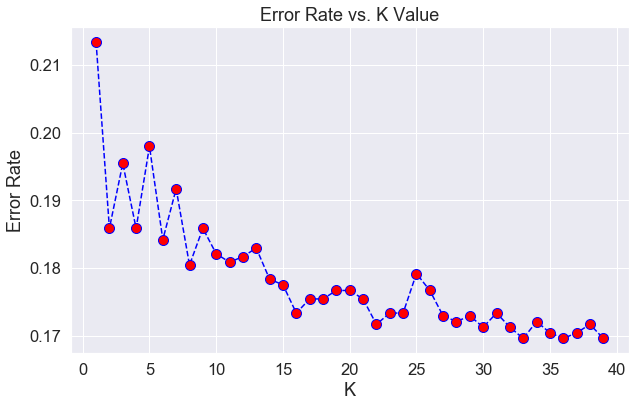

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[1927   48]
 [ 362   57]]


              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1975
           1       0.54      0.14      0.22       419

   micro avg       0.83      0.83      0.83      2394
   macro avg       0.69      0.56      0.56      2394
weighted avg       0.79      0.83      0.78      2394



## https://en.wikipedia.org/wiki/Confusion_matrix

## https://en.wikipedia.org/wiki/F1_score

# Deep Learning

![nnet.png](Images/nnet.png)

In [62]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [63]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
from tensorflow.keras.utils import to_categorical

In [65]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [66]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=4))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


![first_layer](Images/nnet_first_layer.png)

![output_layer](Images/nnet_output_layer.png)

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
 # Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 0.7402 - acc: 0.5274
Epoch 2/100
 - 0s - loss: 0.5704 - acc: 0.8127
Epoch 3/100
 - 0s - loss: 0.4751 - acc: 0.8319
Epoch 4/100
 - 0s - loss: 0.3494 - acc: 0.8319
Epoch 5/100
 - 0s - loss: 0.3044 - acc: 0.8321
Epoch 6/100
 - 0s - loss: 0.2931 - acc: 0.8326
Epoch 7/100
 - 0s - loss: 0.2884 - acc: 0.8332
Epoch 8/100
 - 0s - loss: 0.2861 - acc: 0.8333
Epoch 9/100
 - 0s - loss: 0.2846 - acc: 0.8355
Epoch 10/100
 - 0s - loss: 0.2838 - acc: 0.8342
Epoch 11/100
 - 0s - loss: 0.2831 - acc: 0.8339
Epoch 12/100
 - 0s - loss: 0.2827 - acc: 0.8337
Epoch 13/100
 - 0s - loss: 0.2825 - acc: 0.8349
Epoch 14/100
 - 0s - loss: 0.2821 - acc: 0.8355
Epoch 15/100
 - 0s - loss: 0.2820 - acc: 0.8348
Epoch 16/100
 - 0s - loss: 0.2819 - acc: 0.8351
Epoch 17/100
 - 0s - loss: 0.2816 - acc: 0.8344
Epoch 18/100
 - 0s - loss: 0.2815 - acc: 0.8366
Epoch 19/100
 - 0s - loss: 0.2814 - acc: 0.8357
Epoch 20/100
 - 0s - loss: 0.2813 - acc: 0.8355
E

In [70]:
# add an additional hidden layer of 6 nodes
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=4))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [71]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In [72]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.4408 - acc: 0.7760
Epoch 2/100
 - 0s - loss: 0.3426 - acc: 0.8317
Epoch 3/100
 - 0s - loss: 0.3057 - acc: 0.8317
Epoch 4/100
 - 0s - loss: 0.2906 - acc: 0.8317
Epoch 5/100
 - 0s - loss: 0.2859 - acc: 0.8305
Epoch 6/100
 - 0s - loss: 0.2843 - acc: 0.8319
Epoch 7/100
 - 0s - loss: 0.2835 - acc: 0.8301
Epoch 8/100
 - 0s - loss: 0.2829 - acc: 0.8310
Epoch 9/100
 - 0s - loss: 0.2825 - acc: 0.8308
Epoch 10/100
 - 0s - loss: 0.2822 - acc: 0.8308
Epoch 11/100
 - 0s - loss: 0.2821 - acc: 0.8306
Epoch 12/100
 - 0s - loss: 0.2815 - acc: 0.8332
Epoch 13/100
 - 0s - loss: 0.2819 - acc: 0.8321
Epoch 14/100
 - 0s - loss: 0.2816 - acc: 0.8319
Epoch 15/100
 - 0s - loss: 0.2816 - acc: 0.8332
Epoch 16/100
 - 0s - loss: 0.2814 - acc: 0.8348
Epoch 17/100
 - 0s - loss: 0.2816 - acc: 0.8306
Epoch 18/100
 - 0s - loss: 0.2815 - acc: 0.8317
Epoch 19/100
 - 0s - loss: 0.2816 - acc: 0.8321
Epoch 20/100
 - 0s - loss: 0.2812 - acc: 0.8292
Epoch 21/100
 - 0s - loss: 0.2811 - acc: 0.8349
E

# Compare the models below

In [73]:
 model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.2883 - acc: 0.8283
Normal Neural Network - Loss: 0.2883281742371214, Accuracy: 0.8283208012580872


In [74]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.2963 - acc: 0.8312
Deep Neural Network - Loss: 0.2963445870798632, Accuracy: 0.8312447667121887
